# Visualization of Dataset:

In order to fully comprehend the dataset, I am concentrating on investigating several kinds of visualisations in this section. The objective is to create required and significant graphs for better understanding of the underlying patterns and traits of the data. We can better grasp the structure of the dataset and spot important trends and anomalies by examining these visualisations.

In [ ]:
# To install an essential Python library for data manipulation
!pip install pandas numpy scikit-learn gensim nltk tensorflow

### Importing Libraries:

We have to import specific python libraries that provide necessary functions and tools for handling the data and performing analyses.

In [13]:
# For data manipulation
import pandas as pd
# For numerical operations
import numpy as np
# For splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
# For classification tasks
from sklearn.svm import SVC
# For accessing the performance metrics
from sklearn.metrics import classification_report
# For working with text
import nltk
# for filtering commonly used words
from nltk.corpus import stopwords
# For stemming words
from nltk.stem import PorterStemmer
# For splitting texts into tokens
from nltk.tokenize import word_tokenize

### Loading Dataset:

I have chosen to use Hugging Face Datasets' "surrey-nlp/PLOD-CW" dataset for this investigation which is available in Surrey learn.

In [12]:
# For loading "surrey-nlp/PLOD-CW" dataset from Hugging Face.
from datasets import load_dataset, load_metric
dataset = load_dataset("surrey-nlp/PLOD-CW")

# For converting the 'train' split of the PLOD-CW dataset to a Pandas DataFrame for easier manipulation and analysis.
df = dataset['train'].to_pandas()

### Data Information:

After loading the dataset, we are getting an overview of the data using `head()` function.

Featues breakdown:

- **Tokens** - These are discrete words or symbols that were taken out of the dataset texts.
- **Part-of-speech tags (POS_tags)** - These are the grammatical information that are allocated to each token.
- **Named entity recognition tags (NER_tags)** - These tags group names, locations, organisations, and other attributes into predetermined categories for token classification.

In [48]:
# For displaying the first few rows of the DataFrame to preview its structure and the types of data it contains.
df.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


In [16]:
# Count missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
tokens      0
pos_tags    0
ner_tags    0
dtype: int64


### Data Visualization:

- **Distribution of Token Lengths**
The distribution of token lengths for the training and testing datasets has been represented graphically. These histograms show the variety in the data as well as the typical length of token sequences.
- **Part-of-Speech (POS) Tag Distribution**
The frequency of POS tags in both data divisions are examined. The count plots show a visual depiction of the dataset's linguistic composition, emphasising the prevalence of nouns, adjectives and verbs. This gave me insight into the grammatical structures seen in the text data.
- **Named Entity Recognition (NER) Tag Distribution**
The count graphs show how frequently each sort of identified thing happens. In the training data, I see a dominant frequency of one tag category, indicating a potential imbalance that could affect model training for entity recognition tasks.

These visualisations are crucial for understanding the nature of our dataset and directing future data preparation and model design decisions

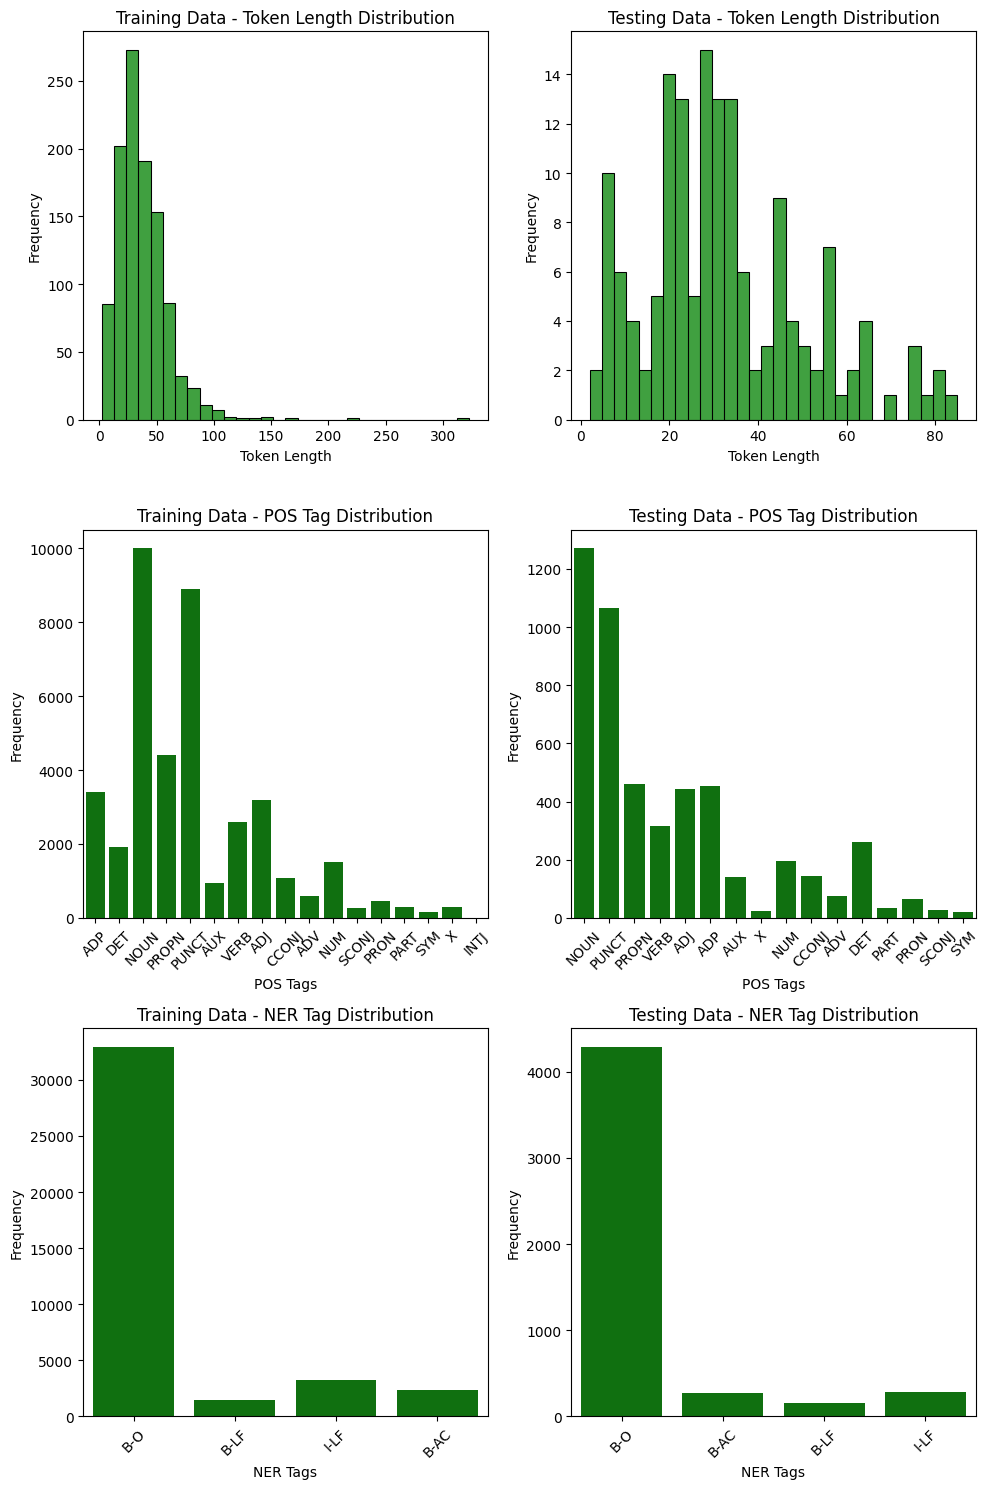

In [19]:
# For Converting to pandas DataFrame
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# For Visualizing token length distribution for training data
train_df['token_length'] = train_df['tokens'].apply(len)
sns.histplot(train_df['token_length'], bins=30, color='green', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Training Data - Token Length Distribution')
axs[0, 0].set_xlabel('Token Length')
axs[0, 0].set_ylabel('Frequency')

# For Visualizing token length distribution for testing data
test_df['token_length'] = test_df['tokens'].apply(len)
sns.histplot(test_df['token_length'], bins=30, color='green', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('Testing Data - Token Length Distribution')
axs[0, 1].set_xlabel('Token Length')
axs[0, 1].set_ylabel('Frequency')

# For Visualizing POS tag distribution for training data
sns.countplot(data=train_df.explode('pos_tags'), x='pos_tags', color='green', ax=axs[1, 0])
axs[1, 0].set_title('Training Data - POS Tag Distribution')
axs[1, 0].set_xlabel('POS Tags')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', rotation=45)

# For Visualizing POS tag distribution for testing data
sns.countplot(data=test_df.explode('pos_tags'), x='pos_tags', color='green', ax=axs[1, 1])
axs[1, 1].set_title('Testing Data - POS Tag Distribution')
axs[1, 1].set_xlabel('POS Tags')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', rotation=45)

# For Visualizing NER tag distribution for training data
sns.countplot(data=train_df.explode('ner_tags'), x='ner_tags', color='green', ax=axs[2, 0])
axs[2, 0].set_title('Training Data - NER Tag Distribution')
axs[2, 0].set_xlabel('NER Tags')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].tick_params(axis='x', rotation=45)

# For Visualizing NER tag distribution for testing data
sns.countplot(data=test_df.explode('ner_tags'), x='ner_tags', color='green', ax=axs[2, 1])
axs[2, 1].set_title('Testing Data - NER Tag Distribution')
axs[2, 1].set_xlabel('NER Tags')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- **Token Frequency Analysis**
The top ten tokens in both the training and testing datasets are displayed in the first subplot. With the use of this analysis, I was able to determine the most often used words and punctuation, many of which are stop words and popular English words that might not significantly contribute to the text's meaning.
- **POS Tag Frequency Analysis**
A comparison of each part-of-speech (POS) tag's frequency is shown in the second subplot. This visual analysis facilitates comprehension of the corpus's grammatical structure.
- **NER Tag Frequency Analysis**
The distribution of entities in the datasets can be accessed with the use of NER tags. 

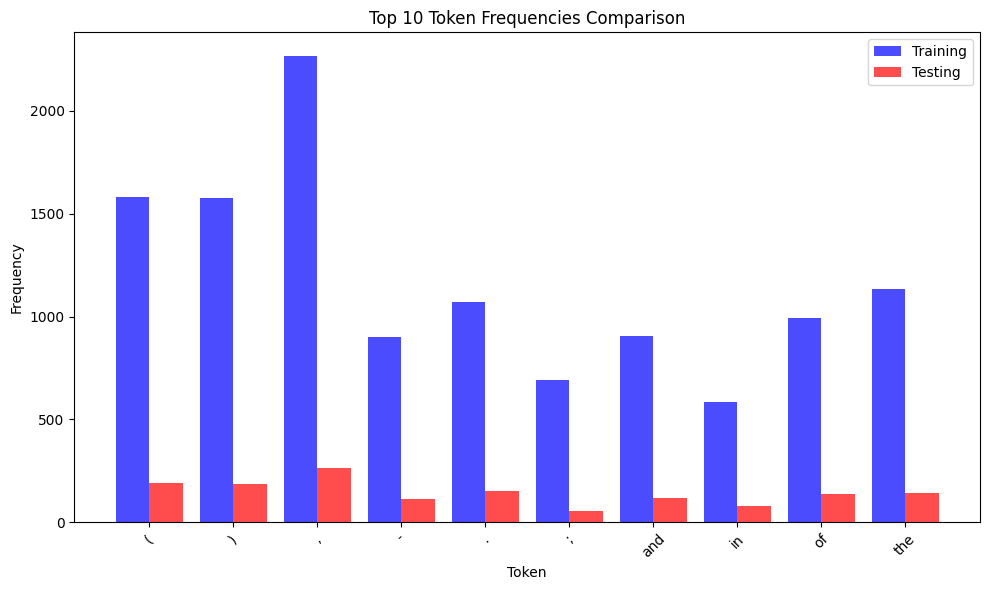

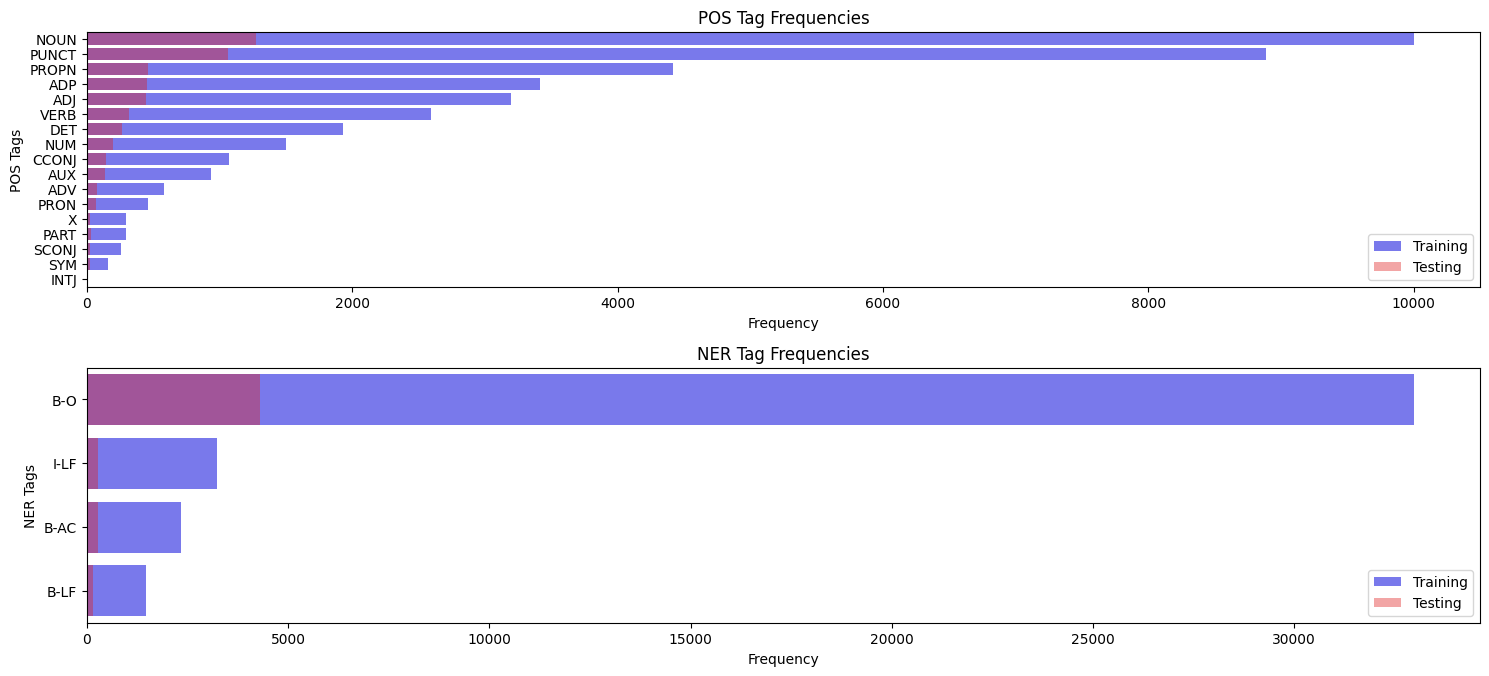

In [45]:
# For Calculating the frequencies of tokens, POS tags, and NER tags from your dataframes
# Explode the tokens column and calculate frequency counts
train_token_freq = train_df['tokens'].explode().value_counts()
test_token_freq = test_df['tokens'].explode().value_counts()

# Identify the top 10 tokens from both training and testing data
top_10_train_tokens = train_token_freq.head(10)
top_10_test_tokens = test_token_freq.head(10)

# Get the union of top 10 tokens from both sets for a consistent x-axis
top_tokens = top_10_train_tokens.index.union(top_10_test_tokens.index)

# Reindex both series to include only the common top tokens
top_10_train_tokens = top_10_train_tokens.reindex(top_tokens).fillna(0)
top_10_test_tokens = top_10_test_tokens.reindex(top_tokens).fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
x = range(len(top_10_train_tokens))  # x-coordinates for the bars

plt.bar(x, top_10_train_tokens, width=0.4, label='Training', color='blue', alpha=0.7)
plt.bar([p + 0.4 for p in x], top_10_test_tokens, width=0.4, label='Testing', color='red', alpha=0.7)

plt.xticks([p + 0.2 for p in x], top_tokens, rotation=45)
plt.title('Top 10 Token Frequencies Comparison')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


train_pos_freq = train_df['pos_tags'].explode().value_counts()
test_pos_freq = test_df['pos_tags'].explode().value_counts()

train_ner_freq = train_df['ner_tags'].explode().value_counts()
test_ner_freq = test_df['ner_tags'].explode().value_counts()

# Ensure consistency in indices for comparison
common_tokens = train_token_freq.index.intersection(test_token_freq.index)
common_pos_tags = train_pos_freq.index.intersection(test_pos_freq.index)
common_ner_tags = train_ner_freq.index.intersection(test_ner_freq.index)

# Filter the data to show only common indices
train_token_freq = train_token_freq.loc[common_tokens].sort_values(ascending=True)[:10]
test_token_freq = test_token_freq.loc[common_tokens].sort_values(ascending=True)[:10]

# Setup for horizontal bar plots
plt.figure(figsize=(15, 10))

# POS tag frequencies
plt.subplot(3, 1, 2)
sns.barplot(x=train_pos_freq.values, y=train_pos_freq.index, color='blue', alpha=0.6, label='Training')
sns.barplot(x=test_pos_freq.values, y=test_pos_freq.index, color='red', alpha=0.4, label='Testing')
plt.title('POS Tag Frequencies')
plt.xlabel('Frequency')
plt.ylabel('POS Tags')
plt.legend()

# NER tag frequencies
plt.subplot(3, 1, 3)
sns.barplot(x=train_ner_freq.values, y=train_ner_freq.index, color='blue', alpha=0.6, label='Training')
sns.barplot(x=test_ner_freq.values, y=test_ner_freq.index, color='red', alpha=0.4, label='Testing')
plt.title('NER Tag Frequencies')
plt.xlabel('Frequency')
plt.ylabel('NER Tags')
plt.legend()

plt.tight_layout()
plt.show()

### Heatmap:

The co-occurrence matrix for tokens in the dataset is shown in the heatmap below. The frequency with which token pairs occur together in the same context is indicated by each cell in the matrix. By highlighting terms that co-occur frequently, this visualisation might provide light on common patterns, themes, or subjects that are present in the dataset. 

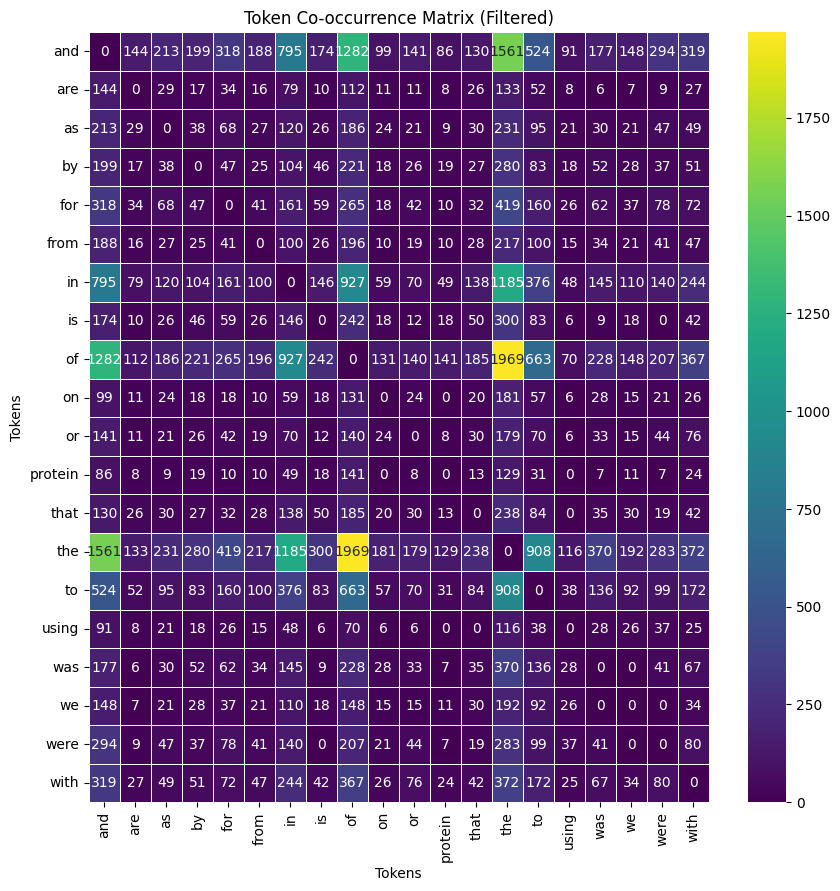

In [47]:
# Assume 'df' is your DataFrame and 'tokens' is the column containing lists of tokens
text_data = df['tokens'].apply(' '.join).tolist()  # Simplified list comprehension

# Use CountVectorizer to create a matrix of token counts
vec = CountVectorizer(max_features=20)  # Limit the number of features to make the matrix more manageable
X = vec.fit_transform(text_data)
Xc = (X.T * X)  # This is the co-occurrence matrix in sparse matrix format
Xc.setdiag(0)  # Set the diagonal to be zeros to avoid self-co-occurrence

# Create a DataFrame from the co-occurrence matrix for easier manipulation
co_occ_df = pd.DataFrame(Xc.toarray(), index=vec.get_feature_names_out(), columns=vec.get_feature_names_out())

# Filter out low co-occurrences to focus on more significant relationships
high_co_occurrence = co_occ_df[co_occ_df > 5].fillna(0)  # Filtering out co-occurrences less than or equal to 5

# Plot the co-occurrence matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(high_co_occurrence, annot=True, fmt=".0f", cmap="viridis", linewidths=.5, cbar=True)
plt.title('Token Co-occurrence Matrix (Filtered)')
plt.xlabel('Tokens')
plt.ylabel('Tokens')
plt.show()


 This visual analysis not only enhances our understanding of the dataset's characteristics but also guides the strategic decisions in the model development process. It is a foundational step that impacts everything from data preprocessing to model evaluation, ultimately influencing the effectiveness and fairness of the predictive models built on this data. 